<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 2

In [4]:
# data prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import dc_stat_think as dcst

from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/repositories/1067/datasets/80dc54c31868c00a584bfa3a195525fa243d839e/'
file = '2015_FINA.csv'
urlretrieve(url+file, file)

df_2015 = pd.read_csv(file, skiprows=4)

url = 'https://assets.datacamp.com/production/repositories/1067/datasets/ed0ba2dca1d7d515d925c62aa0badf02ef00fad8/'
file = '2013_FINA.csv'
urlretrieve(url+file, file)

df_2013 = pd.read_csv(file, skiprows=4)
df_2015.info(), df_2013.info()


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11423 entries, 0 to 11422
Data columns (total 22 columns):
athleteid        11423 non-null int64
lastname         11420 non-null object
firstname        11423 non-null object
birthdate        11423 non-null object
gender           11423 non-null object
name             11423 non-null object
code             11423 non-null object
eventid          11423 non-null int64
heat             11423 non-null int64
lane             11423 non-null int64
points           11352 non-null float64
reactiontime     11362 non-null float64
swimtime         11364 non-null float64
split            11423 non-null int64
cumswimtime      11364 non-null float64
splitdistance    11423 non-null int64
daytime          11423 non-null float64
round            11423 non-null object
distance         11423 non-null int64
relaycount       11423 non-null int64
stroke           11423 non-null object
splitswimtime    11364 non-null float64
dtypes: float64(6), int64(8), objec

(None, None)

In [35]:
df_2015['round'].value_counts(),\
df_2015['distance'].value_counts(),\
df_2015['stroke'].value_counts(),\
df_2015['gender'].value_counts()

(PRE    8904
 FIN    1475
 SEM    1022
 SOS      18
 SOP       4
 Name: round, dtype: int64, 200     2944
 1500    2554
 400     1805
 100     1659
 800     1601
 50       860
 Name: distance, dtype: int64, FREE      6782
 MEDLEY    1288
 BREAST    1205
 FLY       1095
 BACK      1053
 Name: stroke, dtype: int64, M    6187
 F    5236
 Name: gender, dtype: int64)

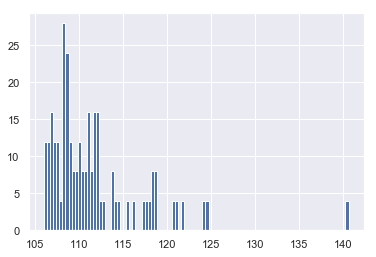

(316,)


In [39]:
idx = (df_2015['round'] == 'PRE') &\
      (df_2015['distance'] == 200) &\
      (df_2015['stroke'] == 'FREE') &\
      (df_2015['gender'] == 'M')
idx = idx & (~df_2015['swimtime'].isna())
mens_200_free_heats = df_2015.loc[idx, 'swimtime'].values
plt.hist(mens_200_free_heats, bins=100)
plt.show()
print(mens_200_free_heats.shape)

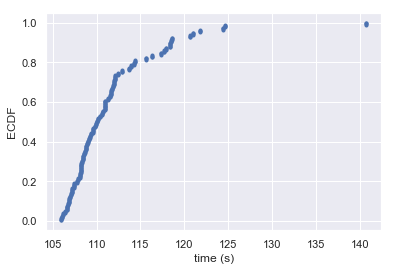

In [38]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
_ = plt.xlabel('time (s)')
_ = plt.ylabel('ECDF')
plt.show()


In [40]:
# data prep - course uses smaller set...
mens_200_free_heats = np.array([118.32, 107.73, 107.  , 106.39, 108.75, 117.74, 108.43, 111.96,
       114.36, 121.77, 108.23, 107.47, 118.41, 108.29, 106.  , 109.32,
       111.49, 112.92, 117.38, 110.95, 108.27, 111.78, 107.87, 110.77,
       109.05, 111.  , 108.77, 106.1 , 106.61, 113.68, 108.2 , 106.2 ,
       111.01, 109.25, 112.  , 118.55, 109.56, 108.18, 111.67, 108.09,
       110.04, 113.97, 109.91, 112.12, 111.65, 110.18, 116.36, 124.59,
       115.59, 121.01, 106.88, 108.96, 109.09, 108.67, 109.6 , 111.85,
       118.54, 108.12, 124.38, 107.17, 107.48, 106.65, 106.91, 140.68,
       117.93, 120.66, 111.29, 107.1 , 108.49, 112.43, 110.61, 110.38,
       109.87, 106.73, 107.18, 110.98, 108.55, 114.31, 112.05])

In [42]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats, np.mean, size=10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats, np.median, size=10000)

# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.48, 112.92] sec.

median time: 110.04 sec.
95% conf int of median: [109.05, 111.29] sec.



In [43]:
# data prep
final_times = np.array([ 52.52,  24.12,  52.82,  24.36,  57.67, 116.41,  58.26,  27.66,
       125.81,  58.75,  27.92, 126.78,  25.93,  24.44,  27.26,  58.22,
       128.66,  24.39,  57.69, 143.61, 128.51,  30.74,  59.02,  27.11,
        57.85,  66.55, 142.76,  57.48,  25.37, 116.27,  54.76, 126.51,
        27.58, 130.2 , 142.76,  57.05,  25.34,  58.86,  27.73,  25.78,
       142.76,  25.85,  24.51,  59.78,  27.99,  57.94, 126.78, 128.49,
        28.17, 116.19, 126.84, 127.76, 129.53,  67.1 ,  31.12, 115.32,
        67.6 ,  66.42,  30.11, 125.56,  66.43, 141.15, 143.19,  66.36,
        30.14, 116.79,  53.58,  53.17,  24.22,  25.64,  26.2 , 116.16,
       127.64,  65.66,  30.13,  59.66, 143.59,  55.64,  52.7 ,  24.96,
        24.31,  67.17,  30.05,  31.14,  53.93,  24.57, 142.44, 115.16,
        59.4 , 115.49,  54.  , 126.34,  30.2 , 126.95,  59.99, 126.4 ])

semi_times = np.array([ 53.  ,  24.32,  52.84,  24.22,  57.59, 116.95,  58.56,  27.7 ,
       126.56,  59.05,  27.83, 127.57,  25.81,  24.38,  27.41,  58.05,
       128.99,  24.52,  57.52, 142.82, 128.16,  31.03,  59.33,  27.18,
        57.63,  66.28, 143.06,  57.36,  25.79, 116.44,  53.91, 127.08,
        27.67, 127.69, 141.99,  57.04,  25.27,  58.84,  27.63,  25.88,
       142.9 ,  25.71,  24.5 ,  59.71,  27.88,  57.77, 126.64, 129.16,
        28.01, 116.51, 126.18, 127.05, 129.04,  67.11,  30.9 , 116.23,
        66.95,  66.21,  30.78, 126.36,  66.64, 142.15, 142.88,  65.64,
        29.98, 116.91,  53.38,  53.78,  24.23,  25.9 ,  25.91, 116.56,
       128.74,  65.6 ,  30.14,  59.55, 142.72,  55.74,  52.78,  25.06,
        24.31,  66.76,  30.39,  30.64,  53.81,  24.47, 142.04, 116.76,
        59.42, 116.37,  53.92, 127.79,  30.25, 127.52,  59.63, 127.57])

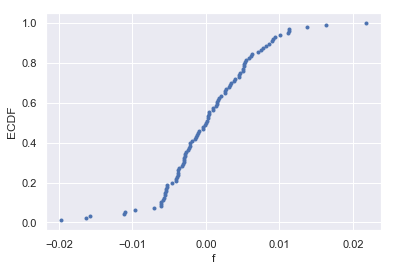

In [44]:
# Compute fractional difference in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x,y = dcst.ecdf(f)

# Make a plot of the ECDF
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()

In [47]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))



mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00093, 0.00175]


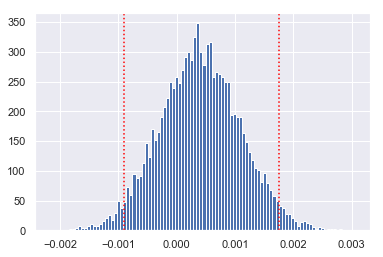

In [46]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(conf_int[0], color='red', linestyle=':')
plt.axvline(conf_int[1], color='red', linestyle=':')
plt.show()

In [55]:
def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out

In [56]:
# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.28


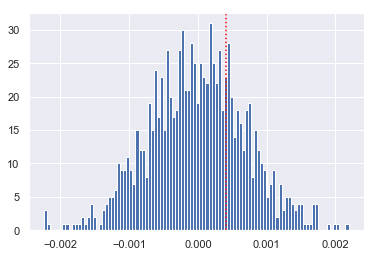

In [57]:
# extra visualisation
plt.hist(perm_reps, bins=100)
plt.axvline(f_mean, color='red', linestyle=':')
plt.show()

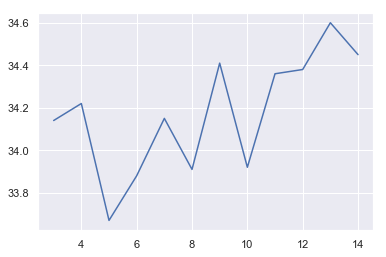

In [63]:
# data prep
split_number = np.array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

splits = np.array([[35.04, 36.39, 35.92, 36.23, 36.67, 36.76, 36.48, 36.85, 36.92,
        36.68, 36.97, 36.98],
       [34.14, 34.22, 33.67, 33.88, 34.15, 33.91, 34.41, 33.92, 34.36,
        34.38, 34.6 , 34.45],
       [31.8 , 31.91, 31.95, 32.04, 31.95, 31.65, 31.57, 31.39, 31.61,
        31.43, 31.46, 31.47],
       [33.16, 32.9 , 32.68, 32.84, 33.55, 33.74, 33.71, 33.6 , 33.71,
        33.12, 33.14, 32.79],
       [32.97, 32.83, 32.99, 32.94, 33.19, 33.6 , 33.72, 33.74, 33.82,
        33.67, 33.86, 33.59],
       [34.6 , 34.57, 34.62, 34.96, 35.1 , 35.22, 35.63, 35.56, 35.43,
        35.67, 35.26, 35.42],
       [32.18, 32.17, 32.15, 32.16, 32.31, 32.27, 32.32, 32.23, 32.42,
        32.34, 32.32, 32.27],
       [32.4 , 32.14, 32.46, 32.43, 32.58, 32.46, 32.6 , 32.42, 32.79,
        32.33, 32.47, 32.63],
       [32.67, 32.54, 32.48, 32.42, 32.55, 32.45, 32.94, 33.03, 33.12,
        33.47, 33.42, 33.48],
       [33.76, 34.95, 34.76, 35.45, 34.99, 36.11, 35.27, 35.82, 35.48,
        36.12, 35.2 , 36.07],
       [32.57, 32.7 , 32.53, 32.73, 32.84, 32.7 , 32.75, 33.07, 33.01,
        33.11, 33.17, 33.02],
       [35.04, 34.69, 34.24, 34.07, 34.47, 34.39, 34.98, 34.56, 35.3 ,
        34.9 , 35.03, 34.08],
       [32.61, 32.97, 33.09, 33.19, 33.72, 33.92, 34.12, 33.82, 34.07,
        34.22, 34.26, 34.07],
       [31.01, 31.49, 31.38, 31.47, 31.58, 31.56, 31.68, 31.68, 32.09,
        31.83, 32.25, 31.67],
       [32.29, 32.36, 32.43, 32.56, 32.84, 32.73, 32.77, 32.78, 32.91,
        33.15, 33.19, 33.32],
       [31.92, 32.14, 31.87, 32.02, 31.84, 32.47, 32.17, 32.73, 32.45,
        33.16, 33.01, 33.08],
       [32.1 , 32.47, 32.32, 32.84, 32.38, 32.93, 32.36, 32.96, 32.72,
        33.35, 32.95, 33.77],
       [35.97, 35.96, 36.09, 36.  , 36.59, 36.55, 36.4 , 36.58, 36.89,
        36.69, 36.81, 36.73],
       [31.69, 31.56, 31.76, 31.43, 31.69, 31.77, 31.88, 31.66, 31.96,
        31.87, 31.66, 31.73],
       [31.71, 32.23, 31.89, 32.31, 32.01, 32.62, 32.12, 33.  , 32.63,
        33.14, 32.55, 33.39],
       [31.99, 31.94, 31.82, 32.02, 31.71, 32.  , 31.79, 31.87, 31.97,
        32.15, 32.09, 32.3 ],
       [31.88, 31.78, 31.67, 31.68, 31.97, 31.7 , 31.71, 31.87, 31.91,
        32.  , 31.83, 32.13],
       [32.49, 32.32, 32.77, 32.8 , 32.87, 32.85, 32.89, 33.  , 33.12,
        32.86, 33.05, 32.75],
       [31.99, 31.93, 31.76, 31.85, 31.95, 31.82, 31.64, 31.49, 31.78,
        31.67, 32.28, 31.85],
       [32.19, 32.32, 32.55, 32.74, 32.59, 32.94, 32.75, 33.09, 32.91,
        33.53, 33.06, 33.  ],
       [32.37, 32.62, 32.38, 33.07, 32.91, 33.45, 32.97, 33.38, 33.24,
        33.33, 32.93, 32.53],
       [32.8 , 33.38, 33.18, 33.78, 33.78, 34.32, 34.1 , 34.88, 33.97,
        34.96, 34.44, 34.93],
       [34.9 , 35.03, 35.25, 35.42, 35.88, 35.63, 35.63, 35.66, 35.45,
        35.66, 35.39, 35.34],
       [32.67, 32.3 , 32.4 , 32.48, 32.52, 32.59, 32.73, 32.67, 32.97,
        32.7 , 32.87, 32.82],
       [32.68, 33.02, 32.8 , 32.94, 33.28, 33.46, 33.2 , 33.42, 33.14,
        33.36, 33.38, 33.31],
       [33.96, 33.93, 33.62, 33.76, 33.31, 33.7 , 33.02, 33.66, 33.57,
        33.37, 33.91, 33.92],
       [32.36, 32.6 , 32.12, 32.67, 32.56, 32.91, 32.84, 33.17, 32.95,
        33.44, 33.25, 33.59],
       [31.69, 31.81, 31.99, 31.99, 32.01, 31.77, 31.67, 31.62, 31.66,
        31.82, 31.63, 31.72],
       [36.95, 37.44, 36.96, 37.12, 37.51, 37.07, 37.49, 36.66, 36.84,
        37.11, 37.55, 37.6 ],
       [32.61, 32.92, 32.74, 32.88, 33.16, 33.21, 33.2 , 33.13, 33.04,
        33.09, 33.31, 33.45],
       [31.01, 31.5 , 31.29, 31.59, 31.77, 31.67, 31.79, 31.94, 32.  ,
        31.98, 32.1 , 32.03],
       [33.66, 33.92, 33.99, 34.21, 33.99, 34.16, 34.22, 34.44, 34.11,
        34.37, 34.43, 34.33],
       [32.91, 33.59, 33.56, 33.96, 34.83, 34.98, 35.43, 35.09, 35.94,
        35.99, 36.16, 35.74],
       [33.23, 34.1 , 33.87, 34.28, 34.23, 34.37, 34.19, 34.38, 34.23,
        34.48, 34.34, 34.4 ],
       [32.34, 32.3 , 32.13, 32.4 , 32.74, 32.57, 32.81, 32.92, 32.89,
        32.92, 33.01, 32.73],
       [30.77, 31.1 , 31.2 , 31.36, 31.31, 31.44, 31.31, 31.7 , 31.75,
        31.64, 31.86, 31.97],
       [31.9 , 31.98, 32.04, 31.98, 31.97, 31.83, 32.04, 31.92, 32.02,
        31.96, 32.07, 31.99],
       [32.39, 32.13, 32.24, 32.28, 32.17, 32.22, 32.1 , 32.25, 32.4 ,
        32.55, 32.64, 32.48]])

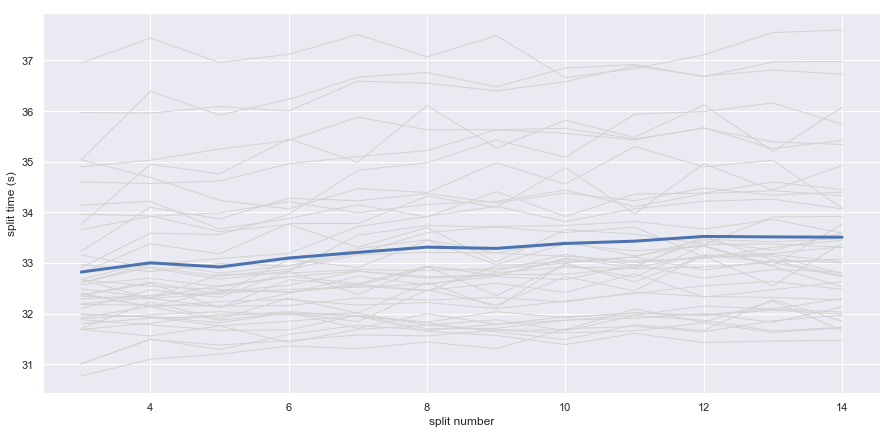

In [72]:
plt.figure(figsize=(15,7))

# Plot the splits for each swimmer
for split in splits:
    _ = plt.plot(split_number, split, linewidth=1, color='lightgray')

# Compute the mean split times
mean_splits = np.mean(splits, axis=0)

# Plot the mean split times
_ = plt.plot(split_number, mean_splits, linewidth=3, markersize=12)

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

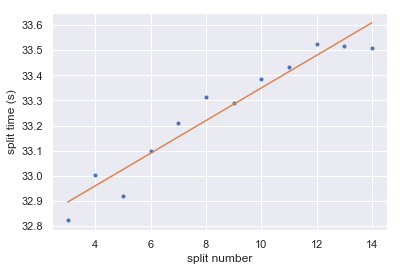


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.051, 0.079] sec./split


In [79]:
# Perform regression
slowdown, split_3 = np.polyfit(split_number, mean_splits, 1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number, mean_splits, size=10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Plot the data with regressions line
_ = plt.plot(split_number, mean_splits, marker='.', linestyle='none')
_ = plt.plot(split_number, split_number * slowdown + split_3, '-')

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))


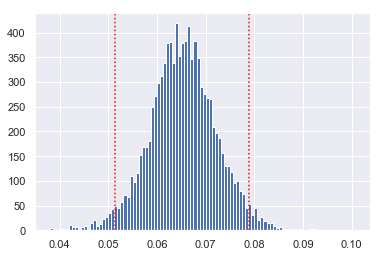

In [78]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(conf_int[0], color='red', linestyle=':')
plt.axvline(conf_int[1], color='red', linestyle=':')
plt.show()

In [90]:
# Observed correlation
rho = dcst.pearson_r(split_number, mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number, mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / len(perm_reps_rho)
print('p =', p_val)


p = 0.0


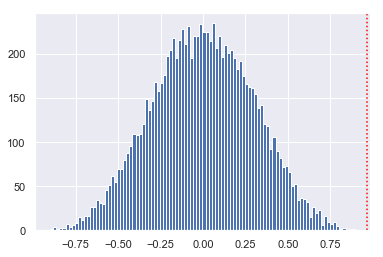

0.965


In [93]:
# extra visualisation
plt.hist(perm_reps_rho, bins=100)
plt.axvline(rho, color='red', linestyle=':')
plt.show()
print('{:.3f}'.format(rho))